# United League Rugby Scraper By Agishan Thaya
Scraping the 
- Team Name
- Player Name
- Position
- Weight
- Height
- Age

#### All the information was scraped off of player pages from https://www.unitedrugby.com/, once scraped into lists, data was formatted into a pandas datafram and outputted to a csv for further statistical analysis.

In [3]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Request the clubs webpage content
page = requests.get("https://www.unitedrugby.com/clubs")
soup = BeautifulSoup(page.content, 'html.parser')

# Find all team titles in the parsed content
teams = soup.find_all("h3")
team_names = []
team_players = []

# Extract team URLs
for team in teams:
    team_name = team.get_text().strip()
    if team_name == "None":
        team_name = ""
    team_name = team_name.replace("\n", "-")
    team_players.append(f"https://www.unitedrugby.com/clubs/{team_name}/")
    team_names.append(f"https://www.unitedrugby.com/clubs/{team_name}/players")


In [ ]:
# Extract player names for each team
names = []
first_names0 = []
last_names0 = []
for team in team_names:
    page = requests.get(team)
    soup = BeautifulSoup(page.content, 'html.parser')
    raw_names = soup.find_all("div", class_="team-member-card__content")
    
    for name in raw_names:
        first_name = name.find("p", class_="team-member-card__first-name").get_text()
        last_name = name.find("p", class_="team-member-card__last-name").get_text()
        first_names0.append(first_name)
        last_names0.append(last_name)
        names.append(f"{team}/{first_name}-{last_name}")


In [ ]:
# Extract player stats
Ages = []
Heights = []
Weights = []
URLs = []
Position = []
for name in names:
    page = requests.get(name)
    soup = BeautifulSoup(page.content, 'html.parser')
    stat_header1 = soup.find_all("div", class_="player-hero__info")
    player_stats = []
    
    for stat in stat_header1:
        player_stats.append(stat.find("p", class_="player-hero__value").get_text())
    
    if len(player_stats) > 0 and player_stats[0] != "":
        stat_position = soup.find("div", class_="player-hero__position").get_text()
        Position.append(stat_position)
        URLs.append(name)
        Ages.append(player_stats[0])
        Heights.append(player_stats[1])
        Weights.append(player_stats[2])

In [55]:

# Initialize empty lists to store extracted teams and names
teams = []
names = []

# Iterate through the URLs list and extract team and name
for url in URLs:
    parts = url.split("/")
    team = parts[-2]
    name = parts[-1]
    teams.append(team)
    names.append(name)
print(teams)
print(names)

['Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Benetton', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-Rugby', 'Cardiff-R

In [ ]:
df["URLs"] = URLs
df['Team'] = teams
df['Names'] = names
df["Position"] = Position
df["Ages"] = Ages
df["Heights"] = Heights
df["Weights"] = Weights
df.to_csv("RugbyData.csv")

# EDA 



In [49]:
df = pd.read_csv("RugbyData.csv")
# Convert height to cm
def convert_height(height):
    if not isinstance(height, str):
        return None

    try:
        # Remove the extra single quote
        height = height.replace("''", "'")
        feet, inches = map(int, height[:-1].split("'"))
        return (feet * 30.48) + (inches * 2.54)
    except ValueError:
        return None

df['Height_cm'] = df['Heights'].apply(convert_height)

# Convert weight to kg
df['Weight_kg'] = df['Weights'].str.extract('(\d+)').astype(float)

# Replace hyphens with spaces in the Names column
df['Names'] = df['Names'].str.replace('-', ' ')

# Convert Ages to integers
df['Ages'] = df['Ages'].astype(int)

# Calculate BMI
df['BMI'] = df['Weight_kg'] / ((df['Height_cm'] / 100) ** 2)

# Drop the original Heights and Weights columns
df.drop(columns=['Heights', 'Weights'], inplace=True)

# Drop rows with NaN or zero values
df_cleaned = df.dropna(subset=['URLs', 'Team', 'Names', 'Position', 'Ages', 'Height_cm', 'Weight_kg', 'BMI'])
df = df_cleaned[df_cleaned['Height_cm'] != 0]
df = df_cleaned[df_cleaned['Weight_kg'] != 0]
df = df_cleaned[df_cleaned['BMI'] != 0]

# Reset the index
df_cleaned = df_cleaned.reset_index(drop=True)

print(df)



     Unnamed: 0                                               URLs  \
0             0  https://www.unitedrugby.com/clubs/Benetton/Fil...   
2             2  https://www.unitedrugby.com/clubs/Benetton/Lor...   
3             3  https://www.unitedrugby.com/clubs/Benetton/Nic...   
4             4  https://www.unitedrugby.com/clubs/Benetton/Mat...   
5             5  https://www.unitedrugby.com/clubs/Benetton/Cor...   
..          ...                                                ...   
712         712  https://www.unitedrugby.com/clubs/Emirates-Lio...   
713         713  https://www.unitedrugby.com/clubs/Emirates-Lio...   
714         714  https://www.unitedrugby.com/clubs/Emirates-Lio...   
715         715  https://www.unitedrugby.com/clubs/Emirates-Lio...   
716         716  https://www.unitedrugby.com/clubs/Emirates-Lio...   

               Team            Names    Position  Ages  Height_cm  Weight_kg  \
0          Benetton   Filippo Alongi        prop    22     182.88      118.0   

In [50]:
df1 = pd.read_csv("Rugby Team Stats.csv")
merged_df = pd.merge(df, df1, on='Team', how='left')
print(merged_df['Pts'].isnull().sum())
print(merged_df)


0
     Unnamed: 0                                               URLs  \
0             0  https://www.unitedrugby.com/clubs/Benetton/Fil...   
1             2  https://www.unitedrugby.com/clubs/Benetton/Lor...   
2             3  https://www.unitedrugby.com/clubs/Benetton/Nic...   
3             4  https://www.unitedrugby.com/clubs/Benetton/Mat...   
4             5  https://www.unitedrugby.com/clubs/Benetton/Cor...   
..          ...                                                ...   
703         712  https://www.unitedrugby.com/clubs/Emirates-Lio...   
704         713  https://www.unitedrugby.com/clubs/Emirates-Lio...   
705         714  https://www.unitedrugby.com/clubs/Emirates-Lio...   
706         715  https://www.unitedrugby.com/clubs/Emirates-Lio...   
707         716  https://www.unitedrugby.com/clubs/Emirates-Lio...   

               Team            Names    Position  Ages  Height_cm  Weight_kg  \
0          Benetton   Filippo Alongi        prop    22     182.88      118.0 

In [51]:
df = merged_df
df = df.drop('Unnamed: 0', axis=1)


               Ages  Height_cm  Weight_kg       BMI      Wins     Drawn  \
Ages       1.000000  -0.021042   0.124510  0.142994  0.066352  0.008260   
Height_cm -0.021042   1.000000   0.415751 -0.316518  0.002001 -0.059851   
Weight_kg  0.124510   0.415751   1.000000  0.725003 -0.021894 -0.024800   
BMI        0.142994  -0.316518   0.725003  1.000000 -0.023027  0.026089   
Wins       0.066352   0.002001  -0.021894 -0.023027  1.000000  0.012284   
Drawn      0.008260  -0.059851  -0.024800  0.026089  0.012284  1.000000   
Lost      -0.066604   0.008864   0.025971  0.017876 -0.983502 -0.192962   
Pts        0.070221  -0.004444  -0.024771 -0.021344  0.979217  0.100390   

               Lost       Pts  
Ages      -0.066604  0.070221  
Height_cm  0.008864 -0.004444  
Weight_kg  0.025971 -0.024771  
BMI        0.017876 -0.021344  
Wins      -0.983502  0.979217  
Drawn     -0.192962  0.100390  
Lost       1.000000 -0.979048  
Pts       -0.979048  1.000000  


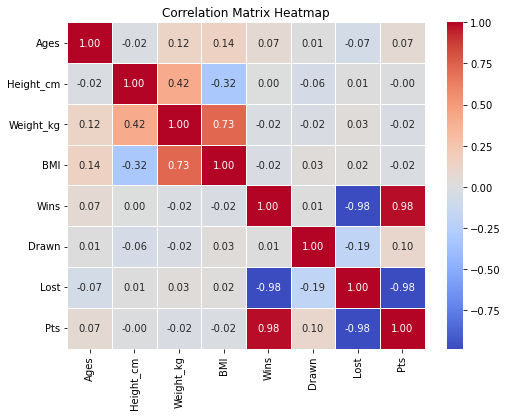

In [52]:
# Drop unnecessary columns
df_cleaned = df.drop(['URLs', 'Team', 'Names','Position', 'Games Played'], axis=1)

# Creating Corrleation Matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


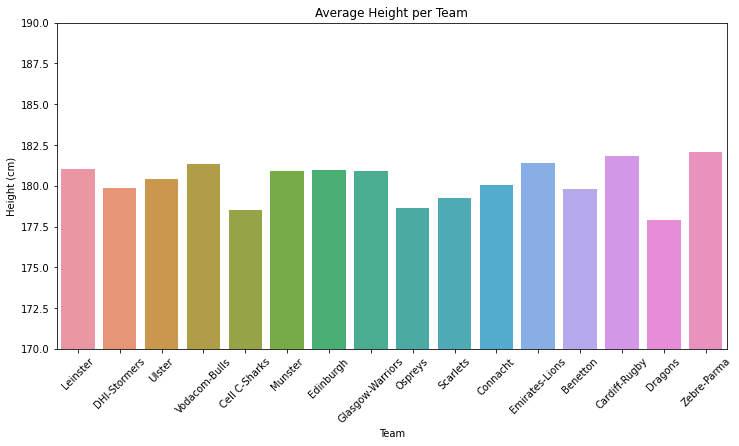

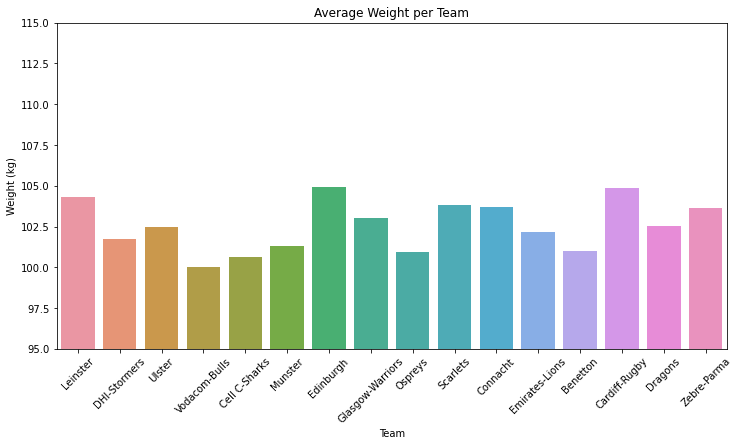

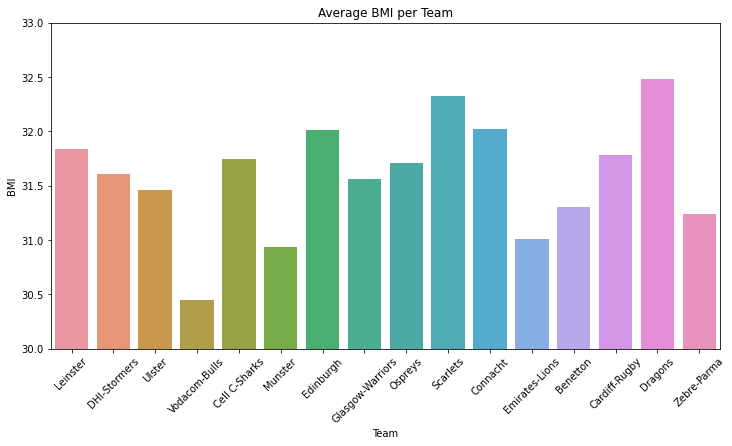

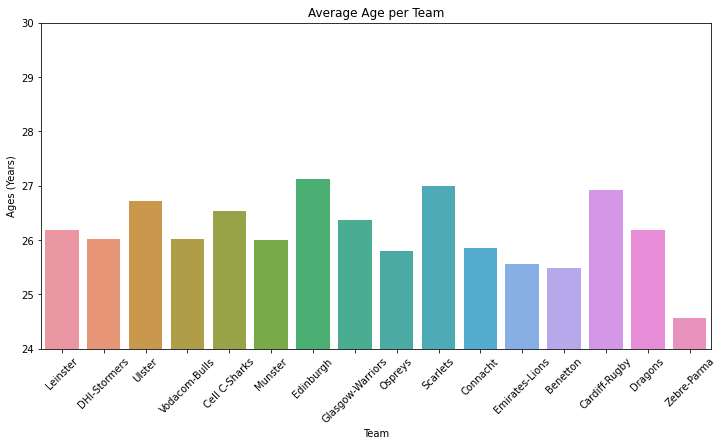

In [61]:
# Calculate average height, weight, BMI, and age per team
team_averages = df.groupby('Team').agg({'Height_cm': 'mean', 'Weight_kg': 'mean', 'BMI': 'mean', 'Ages': 'mean','Pts': 'mean'}).reset_index()

# Sort the team_averages DataFrame based on 'Pts' column in descending order
team_averages_sorted = team_averages.sort_values('Pts', ascending=False)

# Plot average height per team
plt.figure(figsize=(12, 6))
sns.barplot(data=team_averages_sorted, x='Team', y='Height_cm')
plt.title('Average Height per Team')
plt.ylabel('Height (cm)')
plt.ylim(170, 190)
plt.xticks(rotation=45)
plt.show()

# Plot average weight per team
plt.figure(figsize=(12, 6))
sns.barplot(data=team_averages_sorted, x='Team', y='Weight_kg')
plt.title('Average Weight per Team')
plt.ylabel('Weight (kg)')
plt.ylim(95, 115)
plt.xticks(rotation=45)
plt.show()

# Plot average BMI per team
plt.figure(figsize=(12, 6))
sns.barplot(data=team_averages_sorted, x='Team', y='BMI')
plt.title('Average BMI per Team')
plt.ylabel('BMI')
plt.ylim(30, 33)
plt.xticks(rotation=45)
plt.show()

# Plot average age per team
plt.figure(figsize=(12, 6))
sns.barplot(data=team_averages_sorted, x='Team', y='Ages')
plt.title('Average Age per Team')
plt.ylabel('Ages (Years)')
plt.ylim(24,30)
plt.xticks(rotation=45)
plt.show()


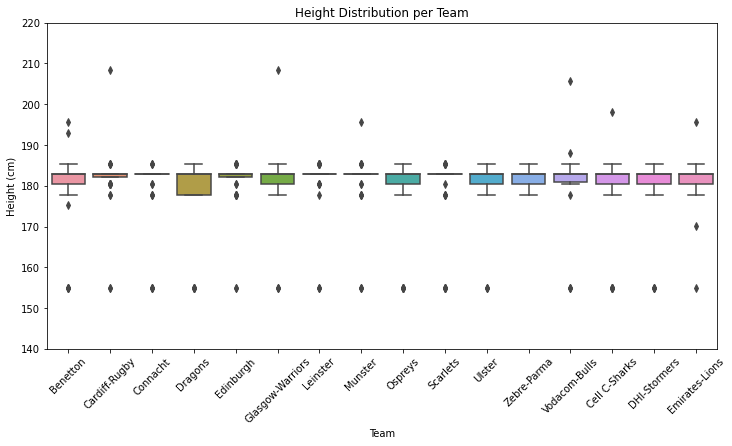

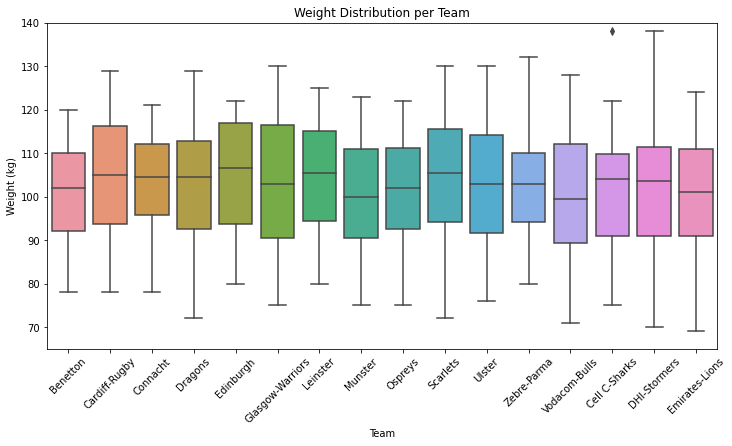

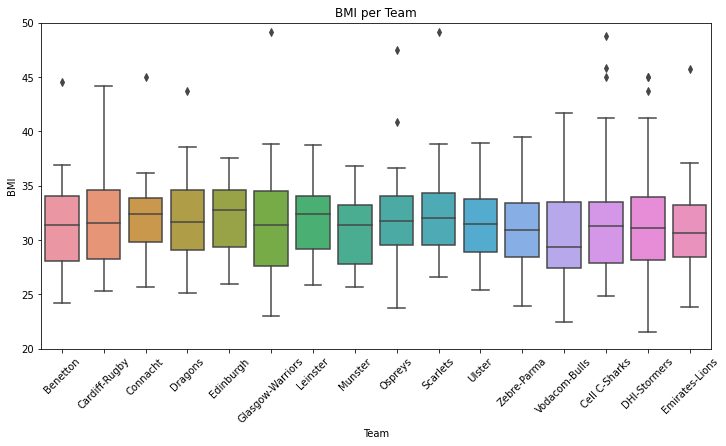

In [62]:
# Box plot for height per team
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Team', y='Height_cm')
plt.title('Height Distribution per Team')
plt.ylabel('Height (cm)')
plt.ylim(140, 220)
plt.xticks(rotation=45)
plt.show()

# Box plot for weight per team
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Team', y='Weight_kg')
plt.title('Weight Distribution per Team')
plt.ylabel('Weight (kg)')
plt.ylim(65, 140)
plt.xticks(rotation=45)
plt.show()

# Box plot for BMI per Team
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Team', y='BMI')
plt.title('BMI per Team')
plt.ylabel('BMI')
plt.ylim(20, 50)
plt.xticks(rotation=45)
plt.show()

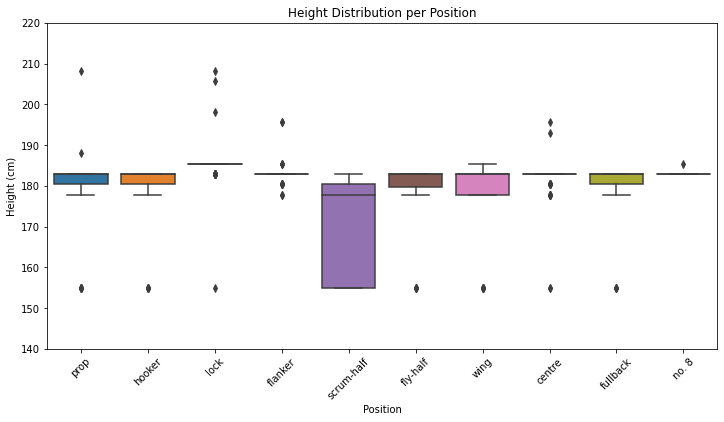

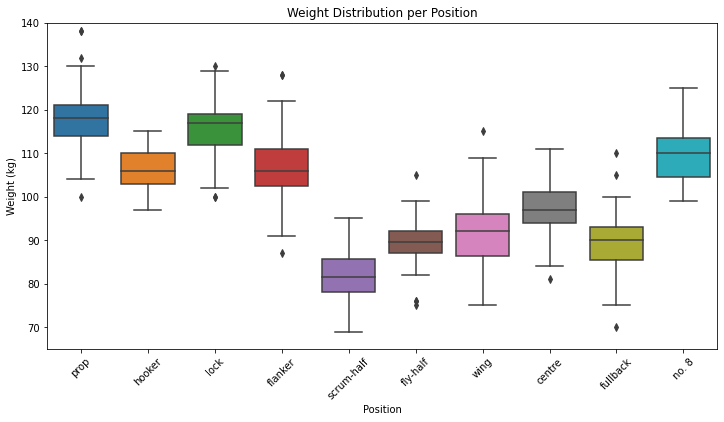

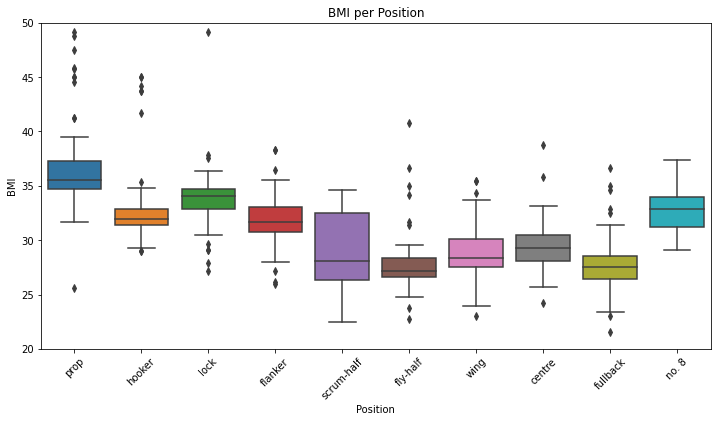

In [48]:
# Box plot for height per position
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Position', y='Height_cm')
plt.title('Height Distribution per Position')
plt.ylabel('Height (cm)')
plt.ylim(140, 220)
plt.xticks(rotation=45)
plt.show()

# Box plot for weight per position
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Position', y='Weight_kg')
plt.title('Weight Distribution per Position')
plt.ylabel('Weight (kg)')
plt.ylim(65, 140)
plt.xticks(rotation=45)
plt.show()

# Box plot for BMI per position
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Position', y='BMI')
plt.title('BMI per Position')
plt.ylabel('BMI')
plt.ylim(20, 50)
plt.xticks(rotation=45)
plt.show()